# KENDAXA ASSIGNMENT - MACHINE LEARNING POSITION
## S&P500 Regression - *by Jan Kořínek*

### Deliverable goals
#### Regression task

Your goal is to perform exploratory data analysis (EDA)
and to train and compare few models on a regression task.
Your task is to predict day-ahed daily volumes of the S&P
500 index using any available information from the past;
i.e., you are going to predict the volume v t+1 using the
information available on days t , t − 1 , . . . .

Evaluate the models performance on out-of-sample data
using data from 2017 and 2018 (i.e., January 1st, 2017 –
December 31st , 2018).

Do not forget that you can use (and should) data outside
the series itself — for example, calendar with known events.

Since your goal is to evaluate and compare several
models along with finding the best, you have to use some
kind of cross-validation as the dataset is quite small (which
is very common for some of the real world datasets).

If you find it applicable, use statistical tests in the EDA
and comparison to distinguis.

#### Report and scope

You are required to write a brief report in the PDF format
(L A TEXusage is recommend) summarizing the approaches
and presenting the results for all three subtasks. It is rec-
ommend to use figures and plots where it will help you
make your point. The report should contain all the necessary
details to understand what approach you have undertaken,
what were the results and how you interpret them.

our report should summarize the main results of your EDA
but it is sufficient to have the details of the EDA only in the
Jupyter notebook. Briefly (very briefly) introduce the used
models. You should compare the models with regards to
more than one metric each with explanation when is each of
the metrics preferable. You should also state your trust in the
individual models — e.g., that even if some model gives you
very good results, you still might not trust it because it is
sensitive to the data changes. Compare the models also with
respect to their robustness and interpretability. Interpret the
few models you will select as your top ranking candidates,
show which features they are relying the most, etc. Where
applicable, perform formal statistical tests to support your
results.

Please, also state the limitations of your work and direc-
tions, in which it can be expanded — it is expected that you
will not be able to exhaust all possible approaches in the
limited time. Please state which of the possible expansions
are most promising and why.

The report is expected to have about 5–12 pages when using
two-column format with figures but there are no hard limits
as the completeness of the presented information is the
goal (as long as there are no empty sentences or fillers, the
length will not be evaluated).

### Content
[1. S&P500 dataset preparation and merging with calendar events](#dataset-preparation)

[2. Initial dataset exploration](#dataset-exploration)

### 1. S&P500 dataset preparation and merging with calendar events <a name="dataset-preparation"></a>

In [40]:
# Load and extract data from raw CSVs into dataframes for S&P500 and relevant events
%run lib/prepare_dataset.py

# Show processed df
sp500_calendar

Processing raw data...


/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


Dataset processing finished in: 0:00:20


,Open,High,Low,Close,Volume,ADP Nonfarm Employment Chang,Building Permit,CB Consumer Confidenc,Core CP,Core Durable Goods Order,Core Retail Sale,Crude Oil Inventorie,Existing Home Sale,FOMC Meeting Minute,Fed Chairman Bernanke Speak,Fed Interest Rate Decisio,GD,ISM Manufacturing PM,ISM Non-Manufacturing PM,Initial Jobless Claim,JOLTs Job Opening,New Home Sale,Nonfarm Payroll,PP,Pending Home Sale,Philadelphia Fed Manufacturing Inde,Retail Sale,US Federal Budge,Unemployment Rat
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.40,359.69,351.98,359.69,1.620700e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.69,360.59,357.89,358.76,1.923300e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.76,358.76,352.89,355.67,1.770000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.67,355.67,351.35,352.20,1.585300e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96000.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.20,354.24,350.54,353.79,1.401100e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-01,4699.26,4718.50,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3790000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2012-09-01,4699.26,4718.50,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3640000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2012-12-01,4699.26,4718.50,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3740000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7


<Figure size 432x288 with 0 Axes>

### 2. Initial dataset exploration <a name="dataset-exploration"></a>

#### Libraries Import and Fonts setup

In [41]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)
plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title


In [42]:
#check the df head
sp500_calendar.head(5)

,Open,High,Low,Close,Volume,ADP Nonfarm Employment Chang,Building Permit,CB Consumer Confidenc,Core CP,Core Durable Goods Order,Core Retail Sale,Crude Oil Inventorie,Existing Home Sale,FOMC Meeting Minute,Fed Chairman Bernanke Speak,Fed Interest Rate Decisio,GD,ISM Manufacturing PM,ISM Non-Manufacturing PM,Initial Jobless Claim,JOLTs Job Opening,New Home Sale,Nonfarm Payroll,PP,Pending Home Sale,Philadelphia Fed Manufacturing Inde,Retail Sale,US Federal Budge,Unemployment Rat
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.40,359.69,351.98,359.69,162070000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.69,360.59,357.89,358.76,192330000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.76,358.76,352.89,355.67,177000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.67,355.67,351.35,352.20,158530000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96000.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.20,354.24,350.54,353.79,140110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#check the df tail
sp500_calendar.tail(5)

,Open,High,Low,Close,Volume,ADP Nonfarm Employment Chang,Building Permit,CB Consumer Confidenc,Core CP,Core Durable Goods Order,Core Retail Sale,Crude Oil Inventorie,Existing Home Sale,FOMC Meeting Minute,Fed Chairman Bernanke Speak,Fed Interest Rate Decisio,GD,ISM Manufacturing PM,ISM Non-Manufacturing PM,Initial Jobless Claim,JOLTs Job Opening,New Home Sale,Nonfarm Payroll,PP,Pending Home Sale,Philadelphia Fed Manufacturing Inde,Retail Sale,US Federal Budge,Unemployment Rat
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-07-01,4699.26,4718.5,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3790000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2012-09-01,4699.26,4718.5,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3640000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2012-12-01,4699.26,4718.5,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3740000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2013-06-01,4699.26,4718.5,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3830000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7
2020-03-15,4699.26,4718.5,4681.32,4697.53,3.491150e+09,0.0,1589000.0,90.6,0.2,0.4,-0.3,-4050000.0,4410000.0,0.0,0.0,0.25,2.0,49.0,52.5,349100.0,3830000.0,619000.0,162000.0,0.5,-2.4,-5.5,-0.7,-1.837000e+09,9.7


In [44]:
# check sampled data
sp500_calendar.sample(10)

,Open,High,Low,Close,Volume,ADP Nonfarm Employment Chang,Building Permit,CB Consumer Confidenc,Core CP,Core Durable Goods Order,Core Retail Sale,Crude Oil Inventorie,Existing Home Sale,FOMC Meeting Minute,Fed Chairman Bernanke Speak,Fed Interest Rate Decisio,GD,ISM Manufacturing PM,ISM Non-Manufacturing PM,Initial Jobless Claim,JOLTs Job Opening,New Home Sale,Nonfarm Payroll,PP,Pending Home Sale,Philadelphia Fed Manufacturing Inde,Retail Sale,US Federal Budge,Unemployment Rat
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-02,1562.17,1573.66,1562.17,1570.25,3.312160e+09,198000.0,946000.0,59.7,0.2,-0.5,1.0,3256000.0,4980000.0,0.0,0.0,0.25,0.4,51.3,56.0,357000.0,3890000.0,411000.0,236000.0,0.7,-0.4,2.0,1.1,NaN,7.70
1995-10-25,586.54,587.19,581.41,582.47,4.336200e+08,NaN,NaN,102.4,0.2,NaN,0.4,-280000.0,4110000.0,NaN,NaN,5.75,NaN,47.1,NaN,356260.0,NaN,701000.0,242000.0,NaN,NaN,1.1,0.8,NaN,5.70
1993-02-03,442.56,447.35,442.56,447.20,3.454100e+08,NaN,NaN,76.7,0.3,NaN,0.5,1490000.0,3710000.0,NaN,NaN,3.00,NaN,55.8,NaN,346480.0,NaN,596000.0,138000.0,NaN,NaN,31.1,1.2,NaN,7.30
2008-05-23,1392.20,1392.20,1373.72,1375.93,3.516380e+09,10000.0,980000.0,62.3,0.1,1.5,0.5,-5300000.0,4890000.0,0.0,0.0,2.00,0.6,48.6,52.0,365000.0,3850000.0,526000.0,-20000.0,0.2,-1.0,-15.6,-0.2,NaN,0.05
2019-12-11,3135.75,3143.98,3133.21,3141.63,3.252540e+09,67000.0,1461000.0,125.5,0.2,0.6,0.2,822000.0,5460000.0,0.0,0.0,1.75,2.1,48.1,53.9,203000.0,7024000.0,733000.0,266000.0,0.4,-1.7,10.4,0.3,NaN,3.50
2012-12-10,1418.07,1421.64,1415.64,1418.55,2.999430e+09,118000.0,866000.0,73.7,0.2,1.5,0.0,-2357000.0,4790000.0,0.0,0.0,0.25,2.7,49.5,54.7,370000.0,3730000.0,368000.0,146000.0,-0.2,5.2,-10.7,-0.3,NaN,7.70
1998-02-18,1022.76,1032.08,1021.70,1032.08,6.060000e+08,NaN,NaN,128.1,0.1,NaN,0.1,2680000.0,4570000.0,NaN,NaN,5.50,NaN,55.7,58.5,315000.0,NaN,864000.0,276000.0,NaN,NaN,19.6,0.3,NaN,4.60
2013-08-22,1645.03,1659.55,1645.03,1656.96,2.537460e+09,200000.0,943000.0,80.3,0.2,0.0,0.5,-1428000.0,5390000.0,0.0,0.0,0.25,1.7,55.4,56.0,336000.0,3940000.0,497000.0,162000.0,0.0,-0.4,9.3,0.2,NaN,7.40
2016-09-06,2181.61,2186.57,2175.10,2186.48,3.447650e+09,177000.0,1152000.0,101.1,0.1,1.5,-0.3,2276000.0,5390000.0,0.0,0.0,0.50,1.1,49.4,51.4,263000.0,5624000.0,654000.0,151000.0,-0.4,1.3,2.0,0.0,NaN,4.90


In [45]:
# check the data types
sp500_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8134 entries, 1990-01-02 to 2020-03-15
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Open                                 8134 non-null   float64
 1   High                                 8134 non-null   float64
 2   Low                                  8134 non-null   float64
 3   Close                                8134 non-null   float64
 4   Volume                               8134 non-null   float64
 5   ADP Nonfarm Employment Chang         5250 non-null   float64
 6   Building Permit                      3563 non-null   float64
 7   CB Consumer Confidenc                8112 non-null   float64
 8   Core CP                              8112 non-null   float64
 9   Core Durable Goods Order             3558 non-null   float64
 10  Core Retail Sale                     7565 non-null   float64
 11  Crude Oil Inventorie

In [46]:
# descriptive statistics summary
sp500_calendar.describe()


,Open,High,Low,Close,Volume,ADP Nonfarm Employment Chang,Building Permit,CB Consumer Confidenc,Core CP,Core Durable Goods Order,Core Retail Sale,Crude Oil Inventorie,Existing Home Sale,FOMC Meeting Minute,Fed Chairman Bernanke Speak,Fed Interest Rate Decisio,GD,ISM Manufacturing PM,ISM Non-Manufacturing PM,Initial Jobless Claim,JOLTs Job Opening,New Home Sale,Nonfarm Payroll,PP,Pending Home Sale,Philadelphia Fed Manufacturing Inde,Retail Sale,US Federal Budge,Unemployment Rat
count,8134.000000,8134.000000,8134.000000,8134.000000,8.134000e+03,5250.000000,3.563000e+03,8112.000000,8112.000000,3558.000000,7565.000000,8.112000e+03,8.112000e+03,3530.0,3558.0,8000.000000,3557.000000,8112.000000,6216.000000,8112.000000,5.333000e+03,8112.000000,8131.000000,3559.000000,5314.00000,8112.000000,7565.000000,2.210000e+02,8112.000000
mean,1449.927989,1458.182617,1441.153016,1450.232155,2.335081e+09,109165.175619,1.148633e+06,94.627305,0.194601,0.157645,0.344455,2.068719e+05,5.007514e+06,0.0,0.0,2.677969,1.864071,52.444305,54.897362,353359.359467,4.927294e+06,546393.910503,128338.762760,0.192386,0.38487,7.908148,0.391183,-1.837000e+09,5.499151
std,944.731760,948.723418,940.657613,944.861231,1.810961e+09,212259.647327,1.239781e+06,26.796562,0.122494,1.392928,1.470607,5.372307e+06,9.837624e+05,0.0,0.0,2.230773,6.549026,5.115314,4.175702,107935.865853,5.043790e+06,277888.755174,199071.197941,0.647407,5.45399,16.951668,1.804815,0.000000e+00,2.278216
min,295.450000,301.450000,294.510000,295.460000,1.499000e+07,-742000.000000,4.900000e+05,25.000000,-0.400000,-7.400000,-17.200000,-7.700000e+07,2.900000e+06,0.0,0.0,0.250000,-32.900000,32.400000,37.300000,-4000.000000,2.150000e+06,1011.000000,-701000.000000,-2.800000,-30.00000,-56.600000,-16.400000,-1.837000e+09,0.040000
25%,866.555000,876.105000,854.000000,868.187500,5.835575e+08,9000.000000,7.470000e+05,72.900000,0.100000,-0.400000,0.000000,-1.800000e+06,4.340000e+06,0.0,0.0,0.250000,1.300000,49.700000,53.000000,303700.000000,3.440000e+06,394000.000000,23000.000000,-0.100000,-1.80000,0.300000,-0.100000,-1.837000e+09,4.400000
50%,1236.120000,1244.935000,1226.715000,1236.180000,2.145965e+09,154000.000000,1.086000e+06,97.400000,0.200000,0.200000,0.300000,1.180000e+05,5.100000e+06,0.0,0.0,2.000000,2.200000,52.700000,55.400000,340180.000000,4.220000e+06,592000.000000,157000.000000,0.200000,0.10000,10.200000,0.300000,-1.837000e+09,5.400000
75%,1851.600000,1866.167500,1841.067500,1852.472500,3.643360e+09,205000.000000,1.298000e+06,113.175000,0.200000,0.800000,0.800000,1.890000e+06,5.520000e+06,0.0,0.0,5.250000,3.100000,55.800000,57.500000,397090.000000,5.534000e+06,744000.000000,245000.000000,0.500000,2.40000,19.600000,0.800000,-1.837000e+09,6.700000
max,4699.260000,4718.500000,4681.320000,4697.530000,1.145623e+10,978000.000000,1.700000e+07,144.700000,0.900000,4.000000,12.400000,9.900000e+07,7.250000e+06,0.0,0.0,8.000000,33.400000,64.700000,66.700000,965000.000000,7.900000e+07,999000.000000,943000.000000,1.800000,44.30000,51.800000,17.700000,-1.837000e+09,14.700000


#### Missing Values Summary and Visualization

Open - Missing Value Summary:
--------------------------------------------------
0 

High - Missing Value Summary:
--------------------------------------------------
0 

Low - Missing Value Summary:
--------------------------------------------------
0 

Close - Missing Value Summary:
--------------------------------------------------
0 

Volume - Missing Value Summary:
--------------------------------------------------
0 

ADP Nonfarm Employment Chang - Missing Value Summary:
--------------------------------------------------
2909 

Building Permit - Missing Value Summary:
--------------------------------------------------
4571 

CB Consumer Confidenc - Missing Value Summary:
--------------------------------------------------
22 

Core CP - Missing Value Summary:
--------------------------------------------------
473 

Core Durable Goods Order - Missing Value Summary:
--------------------------------------------------
4710 

Core Retail Sale - Missing Value Summary:
-------------------

/tmp/ipykernel_11824/1227294655.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


Pending Home Sale - Missing Value Summary:
--------------------------------------------------
2949 

Philadelphia Fed Manufacturing Inde - Missing Value Summary:
--------------------------------------------------
22 

Retail Sale - Missing Value Summary:
--------------------------------------------------
804 

US Federal Budge - Missing Value Summary:
--------------------------------------------------
7913 

Unemployment Rat - Missing Value Summary:
--------------------------------------------------
22 



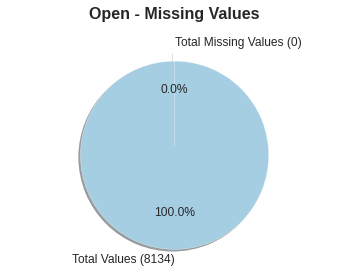

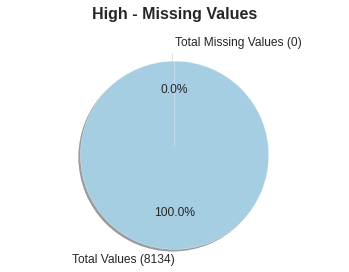

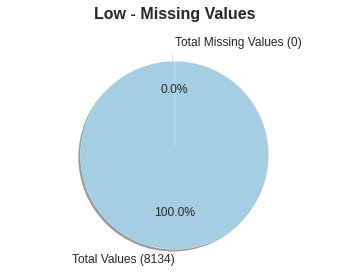

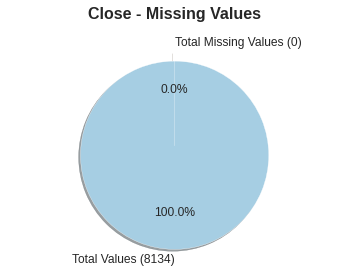

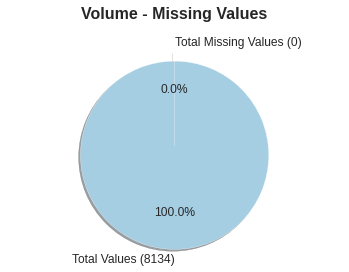

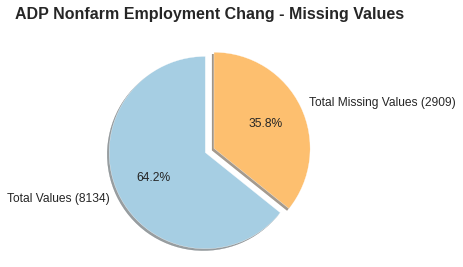

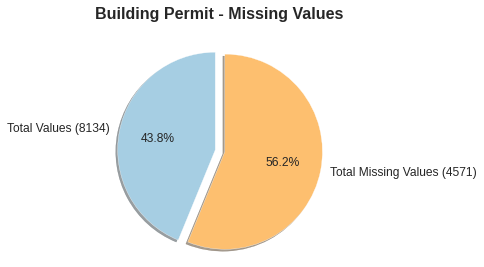

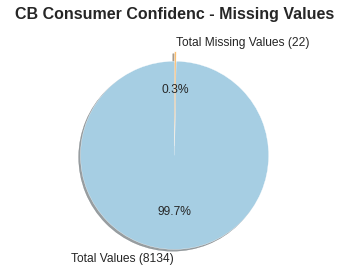

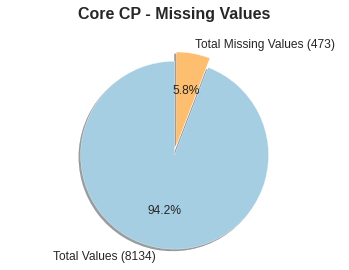

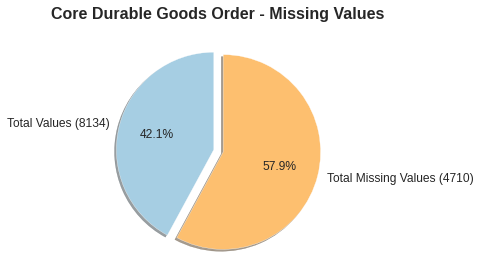

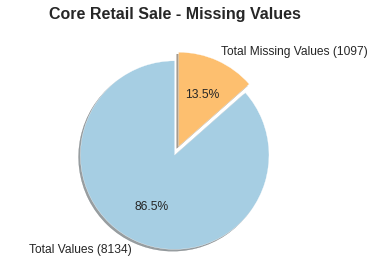

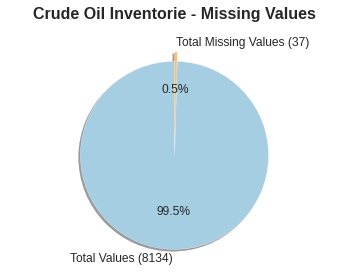

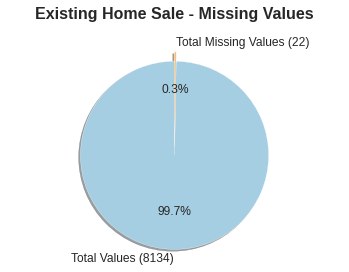

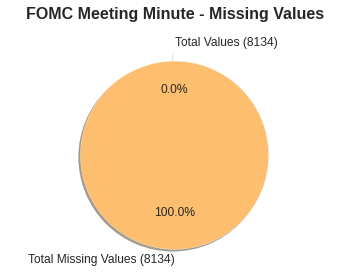

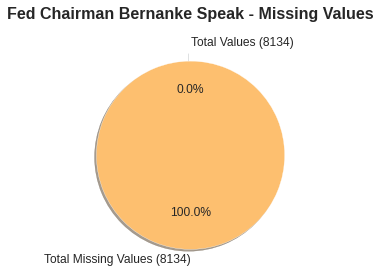

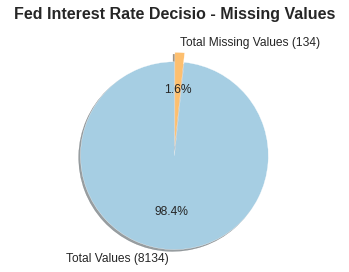

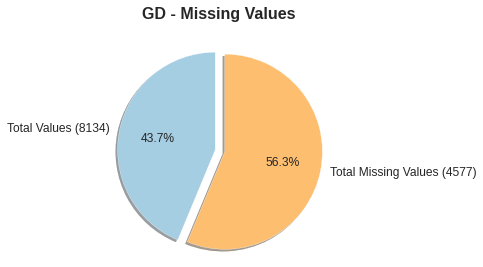

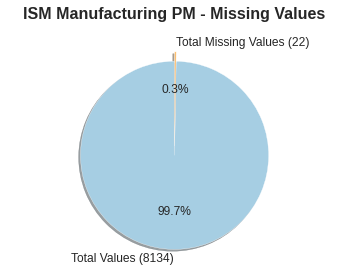

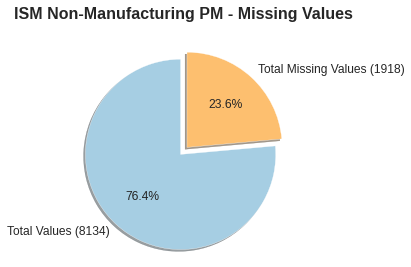

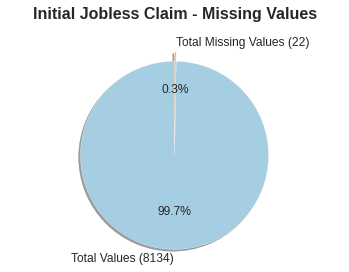

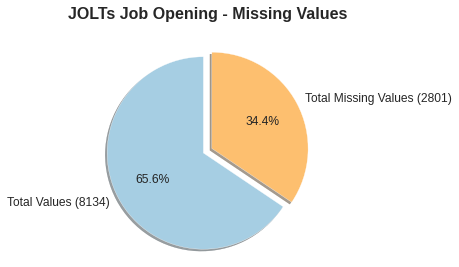

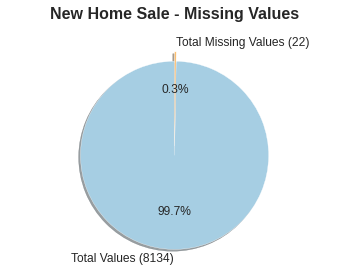

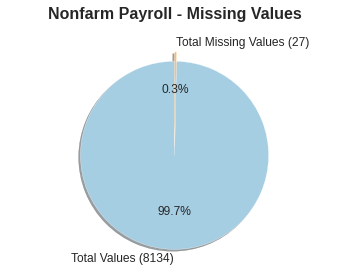

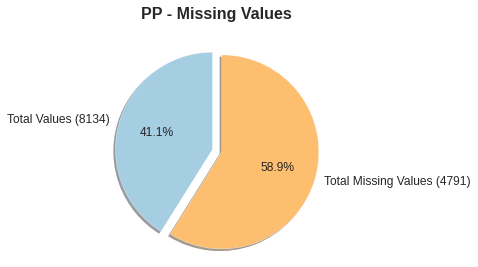

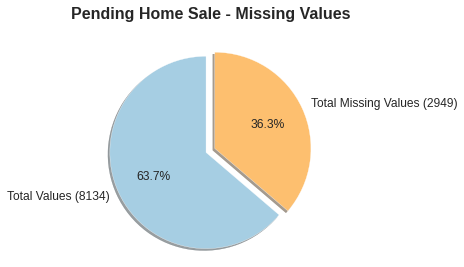

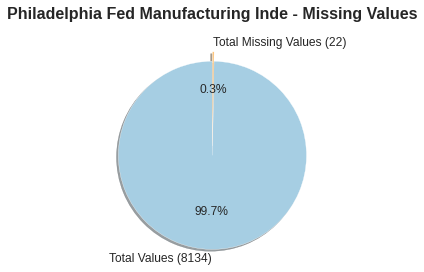

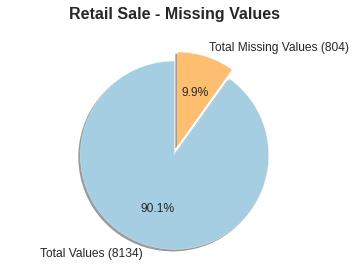

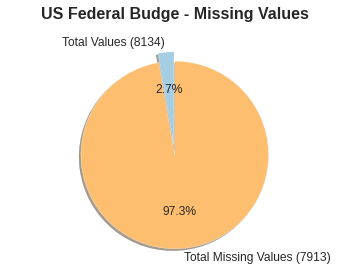

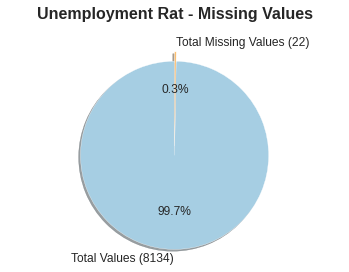

In [47]:
# Missing values summary
sp500_work = copy.deepcopy(sp500_calendar)
sp500_work.replace(0, np.nan, inplace=True)
for key in sp500_work.columns:
    # Overall fractions calculation
    tot_val = sp500_work.shape[0]
    tot_val_nan = sp500_work[key].isna().sum(axis = 0)

    print(f"{key} - Missing Value Summary:")
    print('-'*50)
    print(tot_val_nan,'\n')

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = f'Total Values ({tot_val})', f'Total Missing Values ({tot_val_nan})'
    explode = (0, 0.1,)  # only "explode" the 2nd slice
    theme = plt.get_cmap('Paired')

    fig1, ax1 = plt.subplots()
    sizes = [(tot_val-tot_val_nan), tot_val_nan]

    ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(f"{key} - Missing Values\n", fontsize=LARGE_SIZE, fontweight='bold')

    fig1.set_facecolor('xkcd:white')
    plt.savefig(f'export/pie_missing_val_{key}.pdf', dpi=200)


#### Handling missing values

In [48]:
# Dropping columns with more than 50% of missing values
sp500_work.drop(columns=['Building Permit', 'Core Durable Goods Order', 'FOMC Meeting Minute',
                         'Fed Chairman Bernanke Speak','GD','PP', 'US Federal Budge'], inplace=True)

#### Pair Plot Visualization

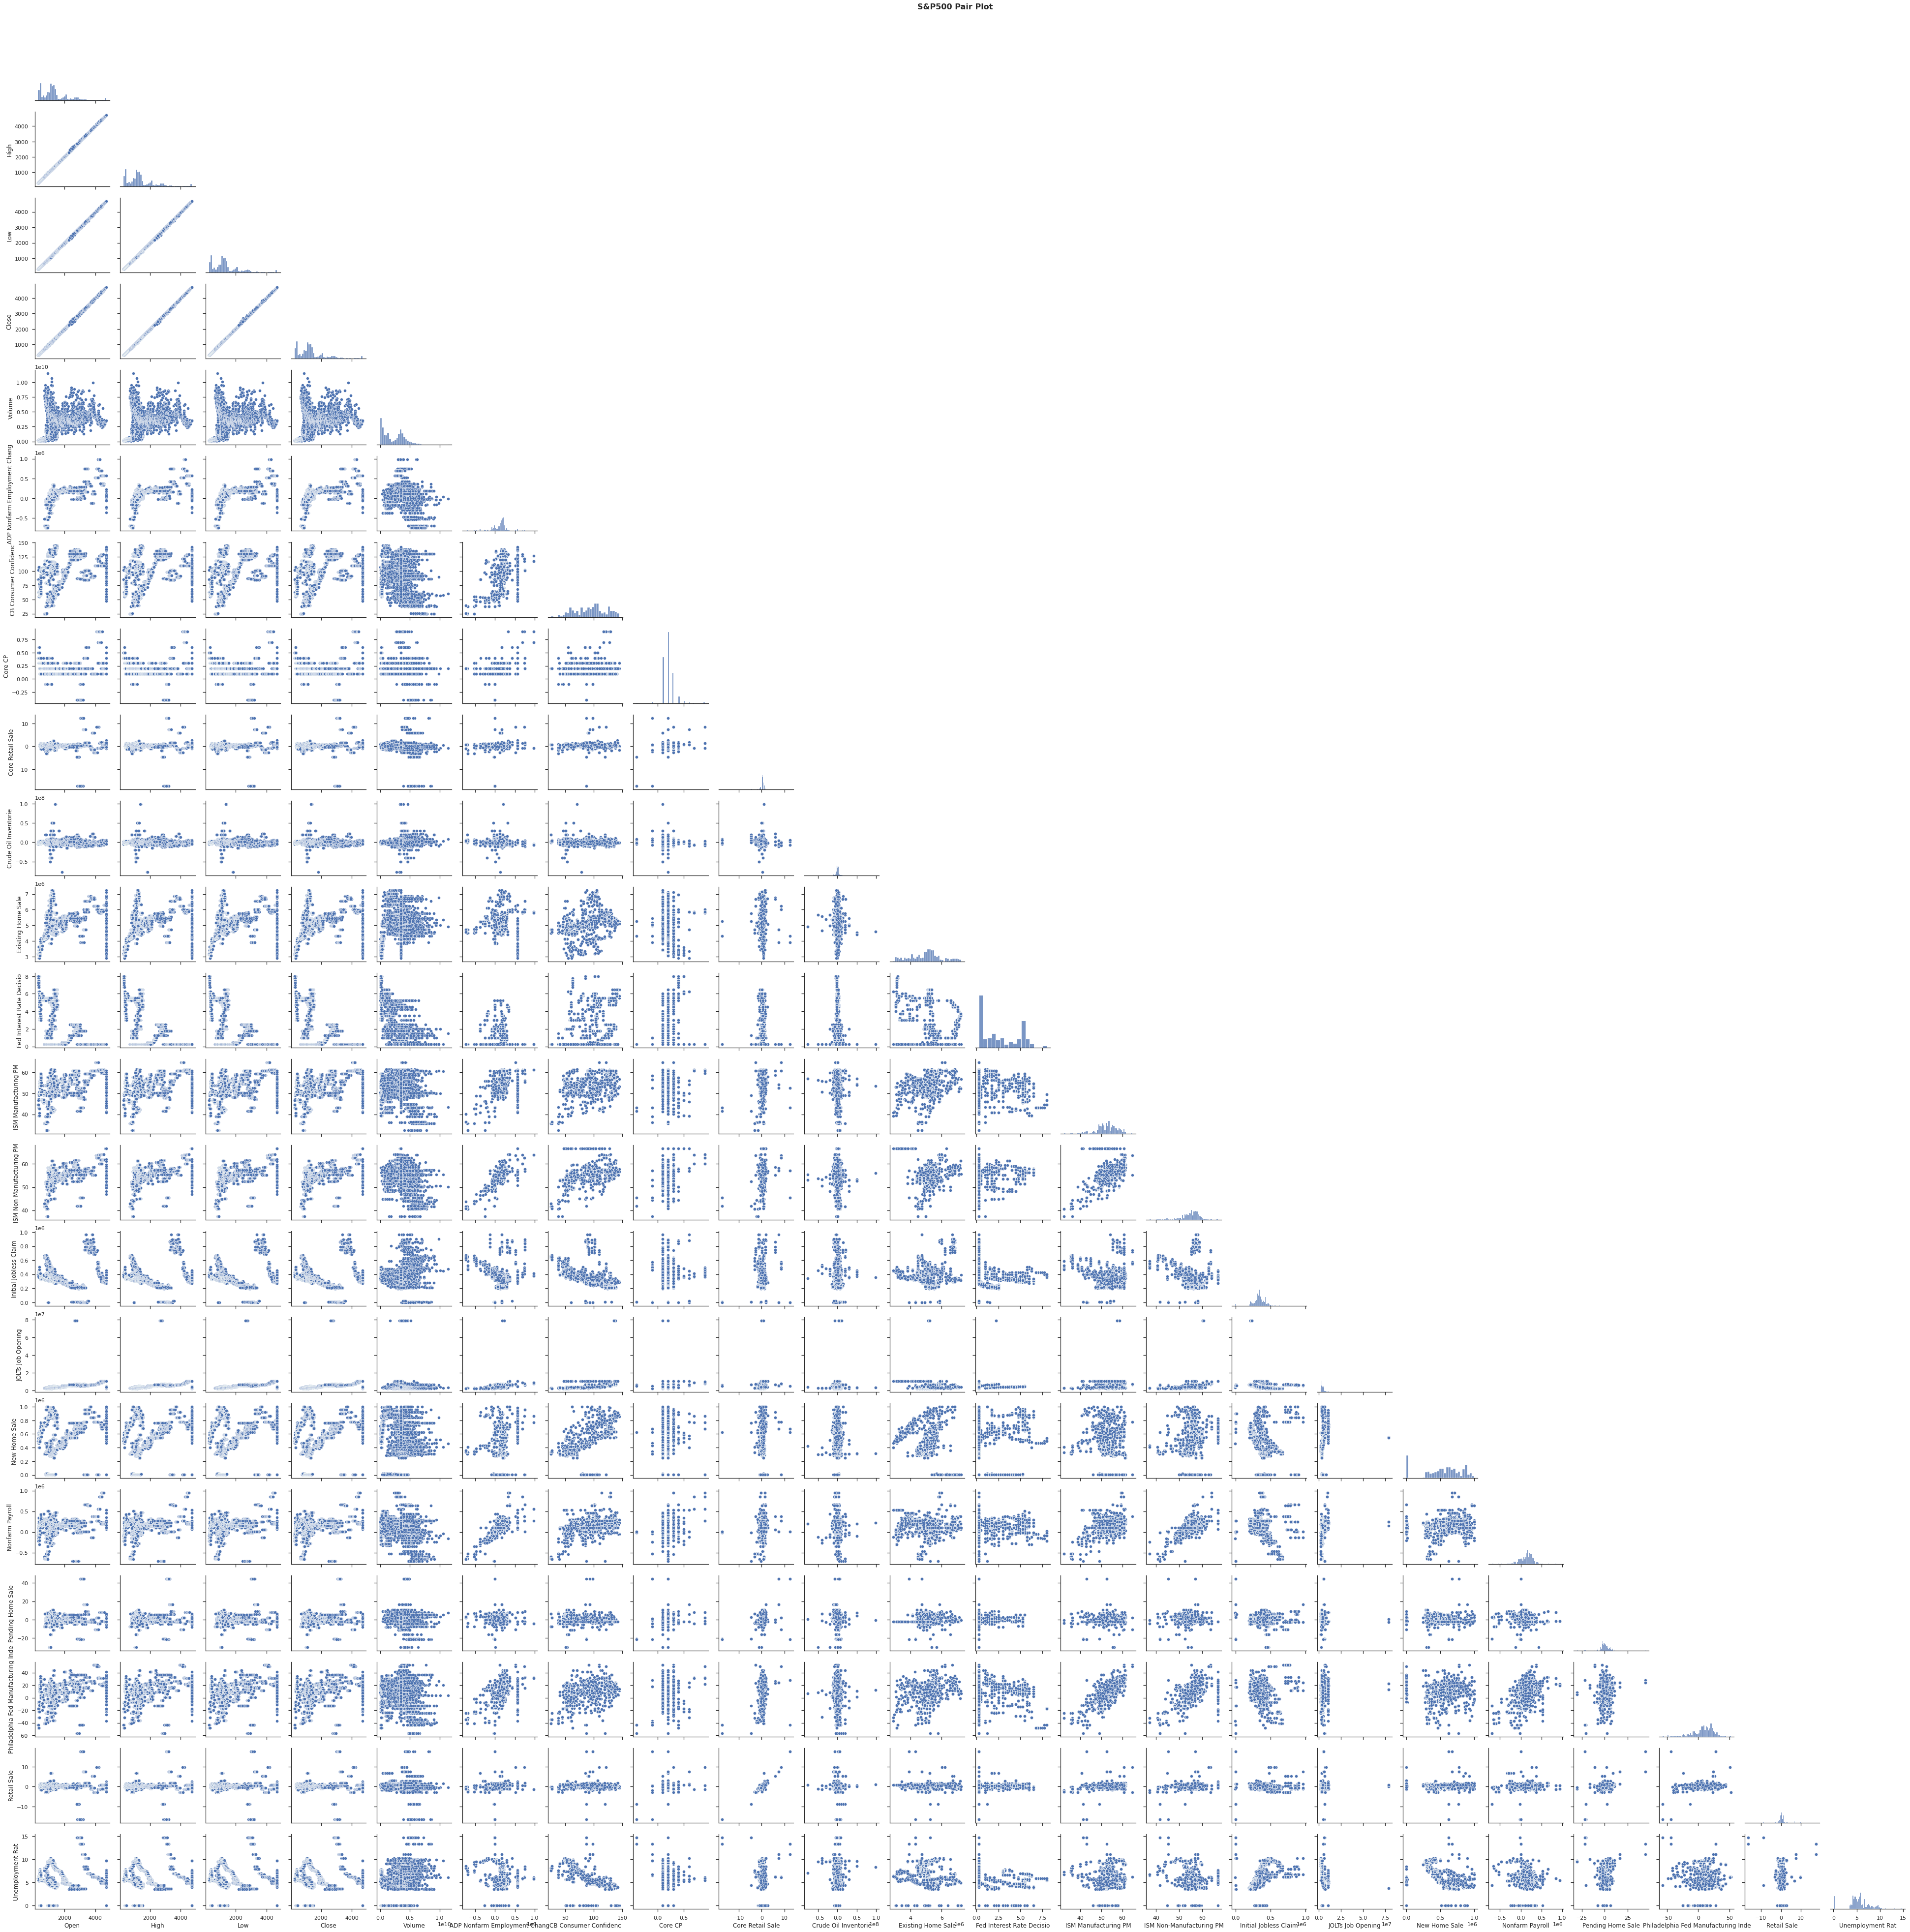

In [49]:
# Print pair plot
columns = sp500_work.columns

sns.set(style="ticks", color_codes=True)
sns.pairplot(sp500_work,vars=columns, dropna=True, corner=True)
plt.suptitle('S&P500 Pair Plot', y=1, fontsize = LARGE_SIZE, fontweight='bold')
plt.savefig('export/sp500_pair_plot.pdf', dpi=600)

#### Correlation Matrix Visualization

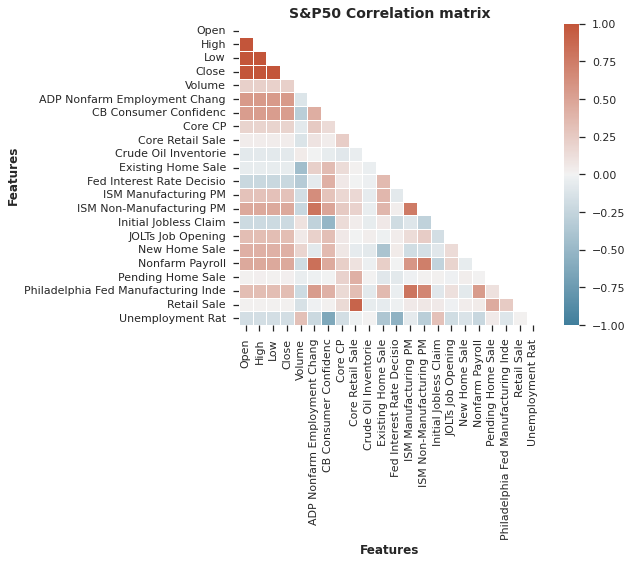

In [57]:
# Clean and prepare df for correlation matrix plot
df_cat = sp500_work.copy(deep=True)
df_cat = df_cat.dropna()

# df_cat = df_cat.drop(columns=['date', 'year_month', 'year'])
# df_cat = pd.get_dummies(df_cat)

# Compute the correlation matrix
corr = df_cat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the matrix
sns.heatmap(corr, mask=mask, annot=False, square=True, linewidths=.5, vmin=-1, vmax=1, cmap=cmap)
plt.title("S&P500 Correlation matrix", fontsize=MEDIUM_SIZE, fontweight='bold')
plt.xlabel("Features", fontweight='bold', fontsize=SMALL_SIZE,)
plt.ylabel("Features", fontweight='bold', fontsize=SMALL_SIZE,)
plt.tight_layout()
plt.savefig('export/sp500_corr_matrix.pdf', dpi=1000)

#### Pairs sorting

In [54]:
# Pair sorting
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.drop_duplicates(inplace=True)

print('----- Strong Positive Pairs -----')
strong_positive_pairs = sorted_pairs[sorted_pairs > 0.5]
strong_positive_pairs.drop_duplicates(inplace=True)
print(strong_positive_pairs,'\n')

print('----- Strong Negative Pairs -----')
strong_negative_pairs = sorted_pairs[sorted_pairs < -0.5]
strong_negative_pairs.drop_duplicates(inplace=True)
print(strong_negative_pairs,'\n \n')



----- Strong Positive Pairs -----
High                                 CB Consumer Confidenc                  0.537330
CB Consumer Confidenc                Close                                  0.537580
                                     Open                                   0.538034
Low                                  CB Consumer Confidenc                  0.538069
Philadelphia Fed Manufacturing Inde  ADP Nonfarm Employment Chang           0.545621
                                     Nonfarm Payroll                        0.551052
ADP Nonfarm Employment Chang         High                                   0.556883
Close                                ADP Nonfarm Employment Chang           0.557745
ADP Nonfarm Employment Chang         Open                                   0.557916
Low                                  ADP Nonfarm Employment Chang           0.558919
ISM Manufacturing PM                 Nonfarm Payroll                        0.585893
ADP Nonfarm Employment Chang   